In [ ]:
# How to visualise?
# https://pypi.org/project/nipet/
# https://www.frontiersin.org/articles/10.3389/fninf.2018.00064/full
# https://github.com/marcomusy/vedo
# https://stackoverflow.com/questions/56035562/3d-dicom-visualisation-in-python
# https://www.youtube.com/watch?v=Tc9ONZLBHP0

# Saliency map?
# https://medium.com/@zeh.henrique92/basic-exploration-and-visualization-of-lung-ct-scans-with-python-e86b8d665bb6

TODO:
    * https://towardsdatascience.com/deep-learning-with-magnetic-resonance-and-computed-tomography-images-e9f32273dcb5
    * https://nilearn.github.io/manipulating_images/input_output.html
    * https://nilearn.github.io/auto_examples/plot_nilearn_101.html
    * https://vincentblog.xyz/posts/medical-images-in-python-computed-tomography?fbclid=IwAR33Nmfoq_u0RcdaXUSEWaJ4PlCOedqHafZnKTnQOQQk5mUuLC9LPvTaziU
    * https://nilearn.github.io/building_blocks/manual_pipeline.html
    * https://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html#targeting-different-subplots

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import dataloader
import utils
import display as dplay

import pandas as pd
from IPython.display import display 
import matplotlib.pyplot as plt
base_dir = 'dataset'
ADNI_dir = base_dir + '/ADNI'

# Load data

## Load xml files to pandas

In [4]:
meta_df = utils.xml_to_pd(dataloader.get_XML(base_dir+'/Meta'))
dplay.display_all_pd_cols(meta_df)

,projectIdentifier,projectDescription,siteKey,subject.subjectIdentifier,subject.researchGroup,subject.subjectSex,subject.subjectInfo_APOE A1,subject.subjectInfo_APOE A2,subject.visit.visitIdentifier,subject.visit.assessment.component.assessmentScore_MMSCORE,subject.visit.assessment.component.assessmentScore_GDTOTAL,subject.visit.assessment.component.assessmentScore_CDGLOBAL,subject.visit.assessment.component.assessmentScore_NPISCORE,subject.visit.assessment.component.assessmentScore_FAQTOTAL,subject.study.studyIdentifier,subject.study.subjectAge,subject.study.ageQualifier,subject.study.weightKg,subject.study.postMortem,subject.study.series.seriesIdentifier,subject.study.series.modality,subject.study.series.dateAcquired,subject.study.imagingProtocol.imageUID,subject.study.imagingProtocol.description,subject.study.imagingProtocol.protocolTerm.protocol_Manufacturer,subject.study.imagingProtocol.protocolTerm.protocol_Mfg Model,subject.study.imagingProtocol.protocolTerm.protocol_Radiopharmaceutical,subject.study.imagingProtocol.protocolTerm.protocol_Number of Rows,subject.study.imagingProtocol.protocolTerm.protocol_Number of Columns,subject.study.imagingProtocol.protocolTerm.protocol_Number of Slices,subject.study.imagingProtocol.protocolTerm.protocol_Frames,subject.study.imagingProtocol.protocolTerm.protocol_Pixel Spacing X,subject.study.imagingProtocol.protocolTerm.protocol_Pixel Spacing Y,subject.study.imagingProtocol.protocolTerm.protocol_Slice Thickness,subject.study.imagingProtocol.protocolTerm.protocol_Convolution Kernel,subject.study.imagingProtocol.protocolTerm.protocol_Counts Source,subject.study.imagingProtocol.protocolTerm.protocol_Randoms Correction,subject.study.imagingProtocol.protocolTerm.protocol_Attenuation Correction,subject.study.imagingProtocol.protocolTerm.protocol_Decay Correction,subject.study.imagingProtocol.protocolTerm.protocol_Reconstruction,subject.study.imagingProtocol.protocolTerm.protocol_Scatter Correction,subject.study.imagingProtocol.protocolTerm.protocol_Radioisotope,dummy
23,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_0295,CN,M,3,4,ADNI2 Initial Visit-Cont Pt,28.0,1.0,0.0,NaN,0.0,34489,90.0493,Y,73.0284,F,111104,PET,2011-06-09,I239487,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.0,2.0,2.0,NaN,EMISSION,DLYD,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,NaN
18,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_0413,CN,F,3,3,ADNI2 Year 2 Visit,30.0,0.0,0.0,NaN,0.0,58439,83.4247,Y,58.0598,F,189346,PET,2013-05-14,I384425,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.0,2.0,2.0,NaN,EMISSION,DLYD,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,NaN
15,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_0413,CN,F,3,3,ADNI2 Initial Visit-Cont Pt,30.0,1.0,0.0,NaN,1.0,34753,81.5151,Y,57.6062,F,111993,PET,2011-06-17,I240813,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.0,2.0,2.0,NaN,EMISSION,DLYD,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,NaN
38,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_0685,CN,F,3,3,ADNI1/GO Month 48,28.0,1.0,0.0,0.0,0.0,27961,93.7973,Y,69.3996,F,89586,PET,2010-07-27,I187652,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.0,2.0,2.0,NaN,EMISSION,DLYD,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,NaN
20,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_0685,CN,F,3,3,ADNI2 Year 1 Visit,28.0,1.0,NaN,NaN,NaN,48136,95.8164,Y,68.9,F,159368,PET,2012-08-02,I321228,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.0,2.0,2.0,NaN,EMISSION,DLYD,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,NaN


# Convert to correct types

In [5]:
utils.convert_df_types(meta_df, types={
    'num':[
        'subject.study.subjectAge',
        'subject.study.weightKg',
        'subject.visit.assessment.component.assessmentScore_MMSCORE',
        'subject.visit.assessment.component.assessmentScore_GDTOTAL',
        'subject.visit.assessment.component.assessmentScore_CDGLOBAL',
        'subject.visit.assessment.component.assessmentScore_NPISCORE',
        'subject.visit.assessment.component.assessmentScore_FAQTOTAL'
    ],
    'datetime':[
        'subject.study.series.dateAcquired'
    ]
})

dplay.display_all_pd_cols(meta_df)

Processing type of subject.study.subjectAge
Processing type of subject.study.weightKg
Processing type of subject.visit.assessment.component.assessmentScore_MMSCORE
Processing type of subject.visit.assessment.component.assessmentScore_GDTOTAL
Processing type of subject.visit.assessment.component.assessmentScore_CDGLOBAL
Processing type of subject.visit.assessment.component.assessmentScore_NPISCORE
Processing type of subject.visit.assessment.component.assessmentScore_FAQTOTAL
Processing type of subject.study.series.dateAcquired


,projectIdentifier,projectDescription,siteKey,subject.subjectIdentifier,subject.researchGroup,subject.subjectSex,subject.subjectInfo_APOE A1,subject.subjectInfo_APOE A2,subject.visit.visitIdentifier,subject.visit.assessment.component.assessmentScore_MMSCORE,subject.visit.assessment.component.assessmentScore_GDTOTAL,subject.visit.assessment.component.assessmentScore_CDGLOBAL,subject.visit.assessment.component.assessmentScore_NPISCORE,subject.visit.assessment.component.assessmentScore_FAQTOTAL,subject.study.studyIdentifier,subject.study.subjectAge,subject.study.ageQualifier,subject.study.weightKg,subject.study.postMortem,subject.study.series.seriesIdentifier,subject.study.series.modality,subject.study.series.dateAcquired,subject.study.imagingProtocol.imageUID,subject.study.imagingProtocol.description,subject.study.imagingProtocol.protocolTerm.protocol_Manufacturer,subject.study.imagingProtocol.protocolTerm.protocol_Mfg Model,subject.study.imagingProtocol.protocolTerm.protocol_Radiopharmaceutical,subject.study.imagingProtocol.protocolTerm.protocol_Number of Rows,subject.study.imagingProtocol.protocolTerm.protocol_Number of Columns,subject.study.imagingProtocol.protocolTerm.protocol_Number of Slices,subject.study.imagingProtocol.protocolTerm.protocol_Frames,subject.study.imagingProtocol.protocolTerm.protocol_Pixel Spacing X,subject.study.imagingProtocol.protocolTerm.protocol_Pixel Spacing Y,subject.study.imagingProtocol.protocolTerm.protocol_Slice Thickness,subject.study.imagingProtocol.protocolTerm.protocol_Convolution Kernel,subject.study.imagingProtocol.protocolTerm.protocol_Counts Source,subject.study.imagingProtocol.protocolTerm.protocol_Randoms Correction,subject.study.imagingProtocol.protocolTerm.protocol_Attenuation Correction,subject.study.imagingProtocol.protocolTerm.protocol_Decay Correction,subject.study.imagingProtocol.protocolTerm.protocol_Reconstruction,subject.study.imagingProtocol.protocolTerm.protocol_Scatter Correction,subject.study.imagingProtocol.protocolTerm.protocol_Radioisotope,dummy
23,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_0295,CN,M,3,4,ADNI2 Initial Visit-Cont Pt,28.0,1.0,0.0,NaN,0.0,34489,90.0493,Y,73.0284,F,111104,PET,2011-06-09,I239487,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.0,2.0,2.0,NaN,EMISSION,DLYD,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,NaN
18,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_0413,CN,F,3,3,ADNI2 Year 2 Visit,30.0,0.0,0.0,NaN,0.0,58439,83.4247,Y,58.0598,F,189346,PET,2013-05-14,I384425,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.0,2.0,2.0,NaN,EMISSION,DLYD,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,NaN
15,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_0413,CN,F,3,3,ADNI2 Initial Visit-Cont Pt,30.0,1.0,0.0,NaN,1.0,34753,81.5151,Y,57.6062,F,111993,PET,2011-06-17,I240813,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.0,2.0,2.0,NaN,EMISSION,DLYD,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,NaN
38,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_0685,CN,F,3,3,ADNI1/GO Month 48,28.0,1.0,0.0,0.0,0.0,27961,93.7973,Y,69.3996,F,89586,PET,2010-07-27,I187652,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.0,2.0,2.0,NaN,EMISSION,DLYD,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,NaN
20,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,002_S_0685,CN,F,3,3,ADNI2 Year 1 Visit,28.0,1.0,NaN,NaN,NaN,48136,95.8164,Y,68.9000,F,159368,PET,2012-08-02,I321228,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.0,2.0,2.0,NaN,EMISSION,DLYD,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,NaN


# Load images

In [6]:
image_list, image_columns = dataloader.get_images(ADNI_dir)
image_df = utils.list_to_pandas(image_list,columns=image_columns)


In [7]:
image_meta_df = utils.merge_df(image_df, meta_df,cols=['subject.subjectIdentifier','subject.study.imagingProtocol.imageUID'])
dplay.display_all_pd_cols(image_meta_df)

,projectIdentifier_x,subject.subjectIdentifier,ImageProtocol.description,dateAcquired,subject.study.imagingProtocol.imageUID,filename,path,projectIdentifier_y,projectDescription,siteKey,subject.researchGroup,subject.subjectSex,subject.subjectInfo_APOE A1,subject.subjectInfo_APOE A2,subject.visit.visitIdentifier,subject.visit.assessment.component.assessmentScore_MMSCORE,subject.visit.assessment.component.assessmentScore_GDTOTAL,subject.visit.assessment.component.assessmentScore_CDGLOBAL,subject.visit.assessment.component.assessmentScore_NPISCORE,subject.visit.assessment.component.assessmentScore_FAQTOTAL,subject.study.studyIdentifier,subject.study.subjectAge,subject.study.ageQualifier,subject.study.weightKg,subject.study.postMortem,subject.study.series.seriesIdentifier,subject.study.series.modality,subject.study.series.dateAcquired,subject.study.imagingProtocol.description,subject.study.imagingProtocol.protocolTerm.protocol_Manufacturer,subject.study.imagingProtocol.protocolTerm.protocol_Mfg Model,subject.study.imagingProtocol.protocolTerm.protocol_Radiopharmaceutical,subject.study.imagingProtocol.protocolTerm.protocol_Number of Rows,subject.study.imagingProtocol.protocolTerm.protocol_Number of Columns,subject.study.imagingProtocol.protocolTerm.protocol_Number of Slices,subject.study.imagingProtocol.protocolTerm.protocol_Frames,subject.study.imagingProtocol.protocolTerm.protocol_Pixel Spacing X,subject.study.imagingProtocol.protocolTerm.protocol_Pixel Spacing Y,subject.study.imagingProtocol.protocolTerm.protocol_Slice Thickness,subject.study.imagingProtocol.protocolTerm.protocol_Convolution Kernel,subject.study.imagingProtocol.protocolTerm.protocol_Counts Source,subject.study.imagingProtocol.protocolTerm.protocol_Randoms Correction,subject.study.imagingProtocol.protocolTerm.protocol_Attenuation Correction,subject.study.imagingProtocol.protocolTerm.protocol_Decay Correction,subject.study.imagingProtocol.protocolTerm.protocol_Reconstruction,subject.study.imagingProtocol.protocolTerm.protocol_Scatter Correction,subject.study.imagingProtocol.protocolTerm.protocol_Radioisotope,dummy
0,ADNI,002_S_5018,ADNI_Brain_PET__Raw_FDG,2012-11-14_08_14_11.0,I346569,ADNI_002_S_5018_PT_ADNI_Brain_PET__Raw_FDG_br_...,dataset/ADNI/002_S_5018/ADNI_Brain_PET__Raw_FD...,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,AD,M,4,4,ADNI2 Baseline-New Pt,NaN,NaN,NaN,NaN,17.0,54479,73.4438,Y,76.2035,F,174525,PET,2012-11-14,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.0,2.0,2.0,NaN,EMISSION,DLYD,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,NaN
1,ADNI,002_S_5018,ADNI_Brain_PET__Raw_FDG,2012-11-14_08_14_11.0,I346569,ADNI_002_S_5018_PT_ADNI_Brain_PET__Raw_FDG_br_...,dataset/ADNI/002_S_5018/ADNI_Brain_PET__Raw_FD...,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,AD,M,4,4,ADNI2 Baseline-New Pt,NaN,NaN,NaN,NaN,17.0,54479,73.4438,Y,76.2035,F,174525,PET,2012-11-14,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.0,2.0,2.0,NaN,EMISSION,DLYD,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,NaN
2,ADNI,002_S_5018,ADNI_Brain_PET__Raw_FDG,2012-11-14_08_14_11.0,I346569,ADNI_002_S_5018_PT_ADNI_Brain_PET__Raw_FDG_br_...,dataset/ADNI/002_S_5018/ADNI_Brain_PET__Raw_FD...,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,AD,M,4,4,ADNI2 Baseline-New Pt,NaN,NaN,NaN,NaN,17.0,54479,73.4438,Y,76.2035,F,174525,PET,2012-11-14,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.0,6.0,2.0,2.0,2.0,NaN,EMISSION,DLYD,CTAC-SG,START,LOR-RAMLA,SS-SIMUL,F-18,NaN
3,ADNI,002_S_5018,ADNI_Brain_PET__Raw_FDG,2012-11-14_08_14_11.0,I346569,ADNI_002_S_5018_PT_ADNI_Brain_PET__Raw_FDG_br_...,dataset/ADNI/002_S_5018/ADNI_Brain_PET__Raw_FD...,ADNI,Alzheimer's Disease Neuroimaging Initiative,002,AD,M,4,4,ADNI2 Baseline-New Pt,NaN,NaN,NaN,NaN,17.0,54479,73.4438,Y,76.2035,F,174525,PET,2012-11-14,ADNI Brain PET: Raw FDG,Philips Medical Systems,GEMINI TF TOF 16,18F-FDG,128.0,128.0,90.

# Save Images to ADNI_categorised

In [8]:
dataloader.save_to_categorised_images(image_meta_df,f"{base_dir}/ADNI_categorised")
print("Finished copying files to new folder..")

Finished copying files to new folder..


# Analysis

## MetaData distribution

In [9]:
def plot_meta_settings(rows=1, cols=2, figsize=(16,16)):
    plt.rcParams.update({'font.size': 15})
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
    #fig.tight_layout() #pad=8.0
    fig.set_tight_layout(True)
    #ax.autoscale(enable=True) 
    return fig, axes

### Overview

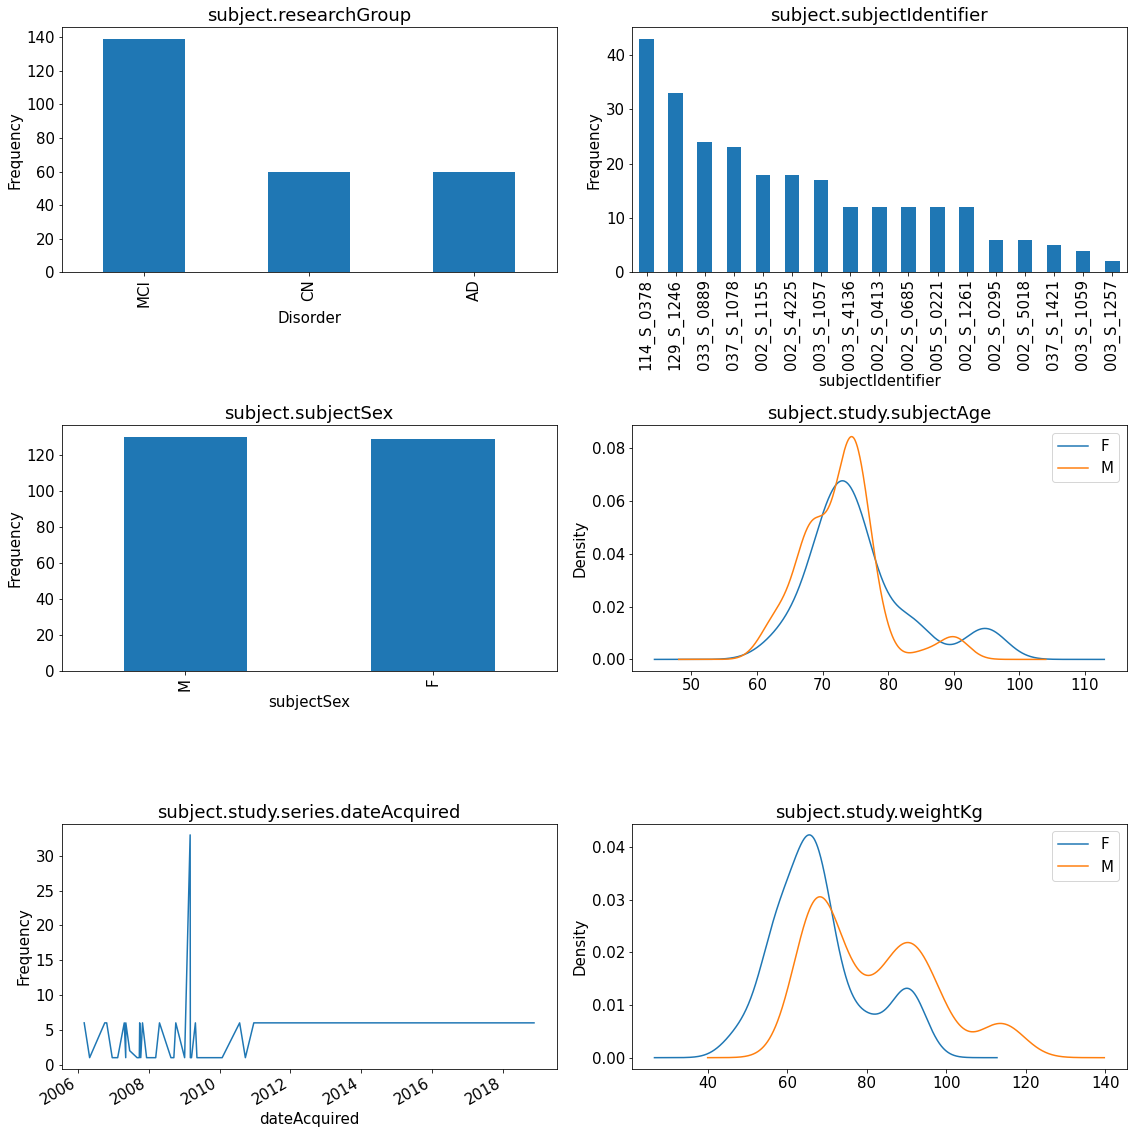

In [10]:
fig, axes = plot_meta_settings(rows=3)

#.plot(); axes[0,0].set_title('A')
image_meta_df['subject.researchGroup'].value_counts().plot(kind='bar',
                                    ax=axes[0,0],
                                    title="subject.researchGroup", xlabel="Disorder", ylabel="Frequency")

image_meta_df['subject.subjectIdentifier'].value_counts().plot(kind='bar',
                                    ax=axes[0,1],
                                    title="subject.subjectIdentifier", xlabel="subjectIdentifier", ylabel="Frequency")

image_meta_df['subject.subjectSex'].value_counts().plot(kind='bar',
                                    ax=axes[1,0],
                                    title="subject.subjectSex", xlabel="subjectSex", ylabel="Frequency")

image_meta_df.groupby('subject.subjectSex')['subject.study.subjectAge'].plot(kind='kde',
                                    ax=axes[1,1],
                                    title="subject.study.subjectAge", xlabel="subjectAge", ylabel="Frequency",legend=True)


pd.value_counts(image_meta_df['subject.study.series.dateAcquired']).plot(
                                    ax=axes[2,0],
                                    title="subject.study.series.dateAcquired", xlabel="dateAcquired", ylabel="Frequency")

image_meta_df.groupby('subject.subjectSex')['subject.study.weightKg'].plot(kind='kde',
                                    ax=axes[2,1],
                                    title="subject.study.weightKg", xlabel="weightKg", ylabel="Frequency",legend=True)



plt.show()

### Data sizes

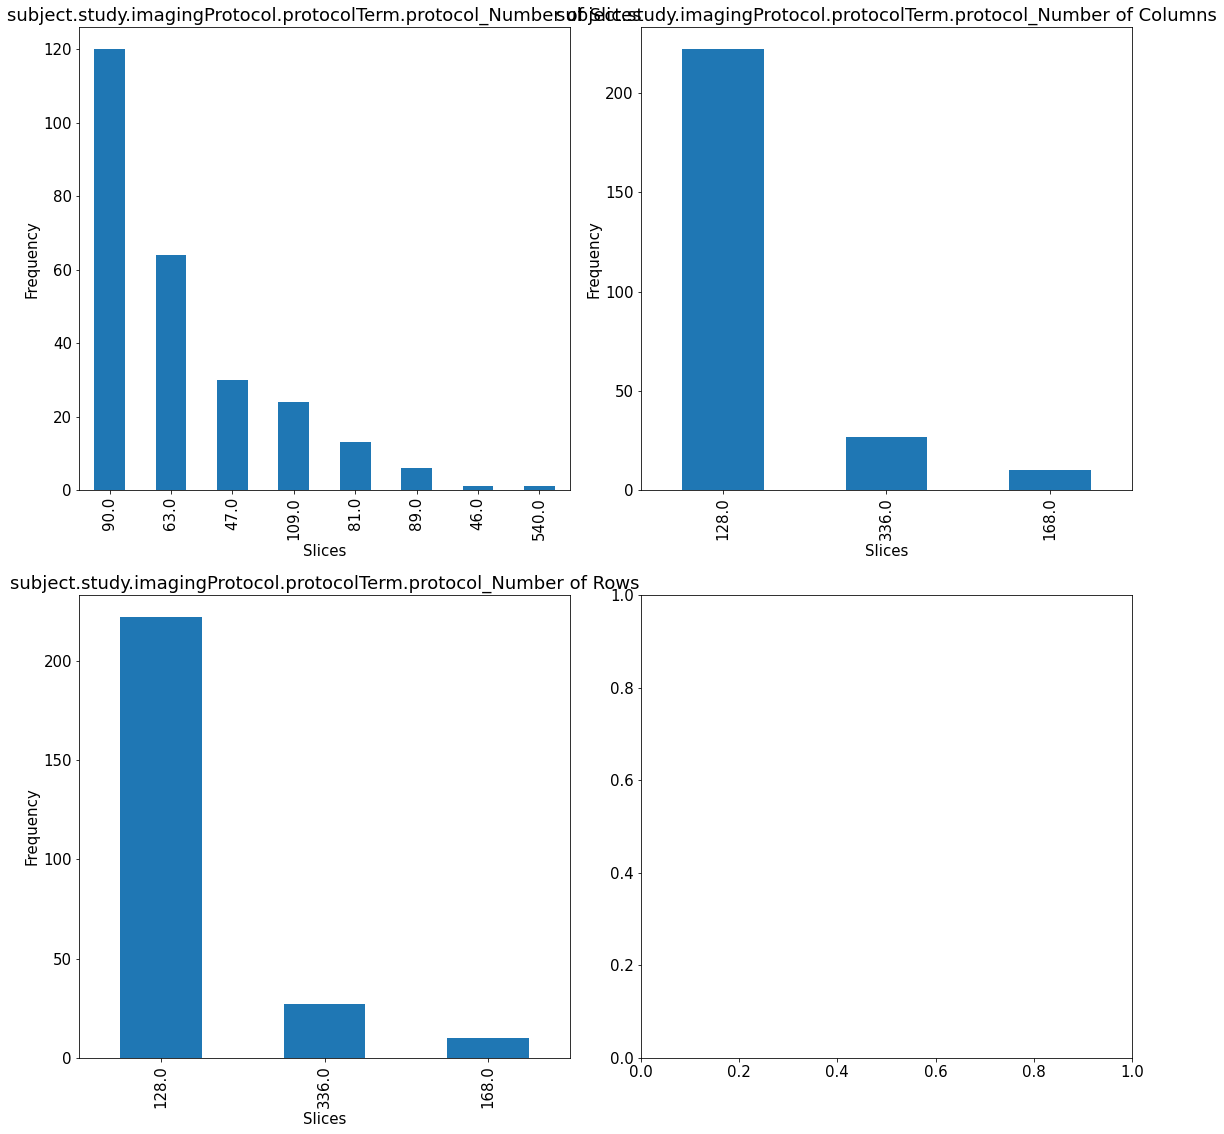

In [11]:
fig, axes = plot_meta_settings(rows=2)
image_meta_df['subject.study.imagingProtocol.protocolTerm.protocol_Number of Slices'].value_counts().plot(kind="bar",
                                    ax=axes[0,0],
                                    title="subject.study.imagingProtocol.protocolTerm.protocol_Number of Slices", xlabel="Slices", ylabel="Frequency")

image_meta_df['subject.study.imagingProtocol.protocolTerm.protocol_Number of Columns'].value_counts().plot(kind="bar",
                                    ax=axes[0,1],
                                    title="subject.study.imagingProtocol.protocolTerm.protocol_Number of Columns", xlabel="Slices", ylabel="Frequency")

image_meta_df['subject.study.imagingProtocol.protocolTerm.protocol_Number of Rows'].value_counts().plot(kind="bar",
                                    ax=axes[1,0],
                                    title="subject.study.imagingProtocol.protocolTerm.protocol_Number of Rows", xlabel="Slices", ylabel="Frequency")
plt.show()

### Scoring

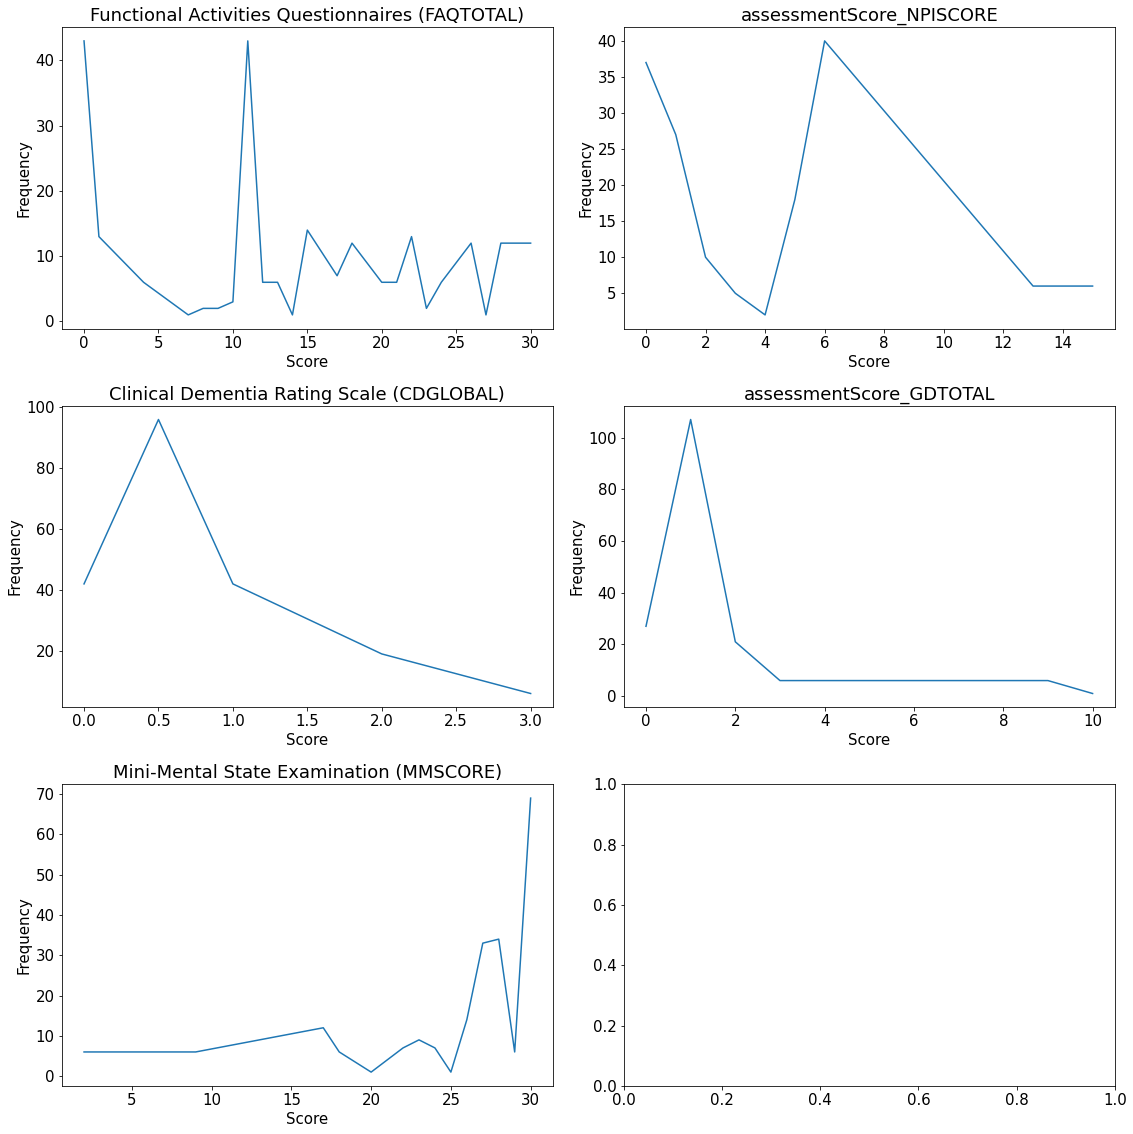

In [12]:
fig, axes = plot_meta_settings(rows=3)
image_meta_df['subject.visit.assessment.component.assessmentScore_FAQTOTAL'].value_counts().sort_index().plot(
                                    ax=axes[0,0],
                                    title="Functional Activities Questionnaires (FAQTOTAL)", xlabel="Score", ylabel="Frequency")

image_meta_df['subject.visit.assessment.component.assessmentScore_NPISCORE'].value_counts().sort_index().plot(
                                    ax=axes[0,1],
                                    title="assessmentScore_NPISCORE", xlabel="Score", ylabel="Frequency")

image_meta_df['subject.visit.assessment.component.assessmentScore_CDGLOBAL'].value_counts().sort_index().plot(
                                    ax=axes[1,0],
                                    title="Clinical Dementia Rating Scale (CDGLOBAL)", xlabel="Score", ylabel="Frequency")

image_meta_df['subject.visit.assessment.component.assessmentScore_GDTOTAL'].value_counts().sort_index().plot(
                                    ax=axes[1,1],
                                    title="assessmentScore_GDTOTAL", xlabel="Score", ylabel="Frequency")

image_meta_df['subject.visit.assessment.component.assessmentScore_MMSCORE'].value_counts().sort_index().plot(
                                    ax=axes[2,0],
                                    title="Mini-Mental State Examination (MMSCORE)", xlabel="Score", ylabel="Frequency")
plt.show()

## Visualise brain slices

### Create Image generator

In [13]:
import os
import numpy as np
SKIP_LAYERS = 10
LIMIT_LAYERS = 70

In [14]:
image_AD_generator = dataloader.load_nii_data(f"{base_dir}/ADNI_categorised/AD/")
image_CN_generator = dataloader.load_nii_data(f"{base_dir}/ADNI_categorised/CN/")
image_MCI_generator = dataloader.load_nii_data(f"{base_dir}/ADNI_categorised/MCI/")

In [15]:
first_AD_image = next(image_AD_generator)
first_CN_image = next(image_CN_generator)
first_MCI_image = next(image_MCI_generator)

In [16]:
first_AD_image[0,:,:].shape

(336, 336)

### Coronal plane (From top)

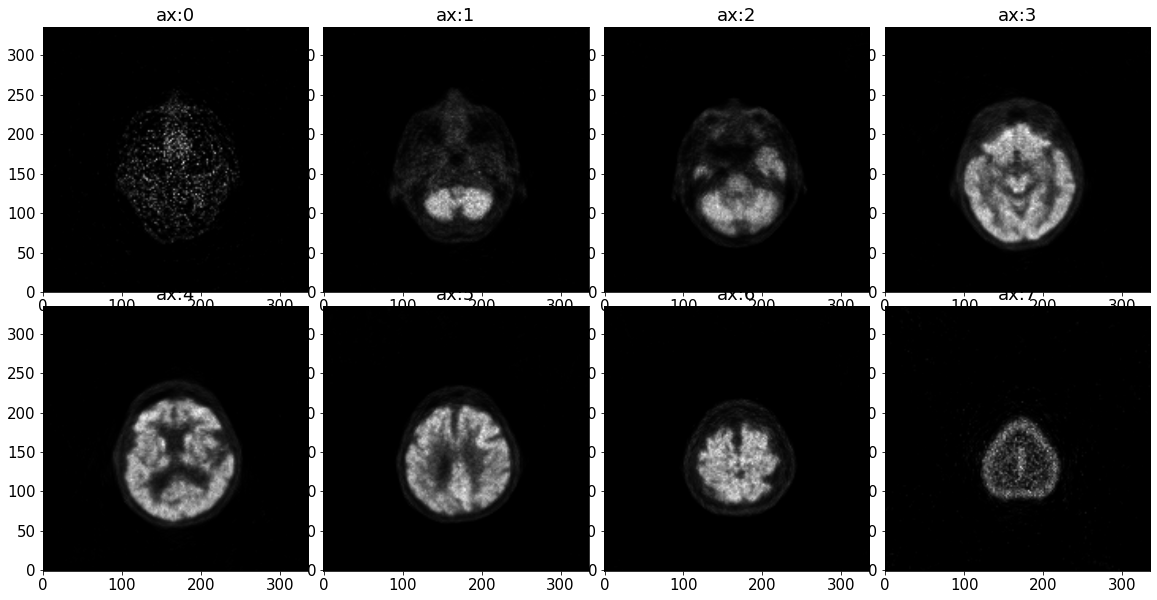

Text(0.5, 0.98, 'Coronal plane - AD')

<Figure size 432x288 with 0 Axes>

In [74]:
image_AD_slices = [first_AD_image[layer,:,:] for layer in range(0,first_AD_image.shape[0],SKIP_LAYERS)]
dplay.display_advanced_plot(image_AD_slices)
plt.suptitle("Coronal plane - AD")  

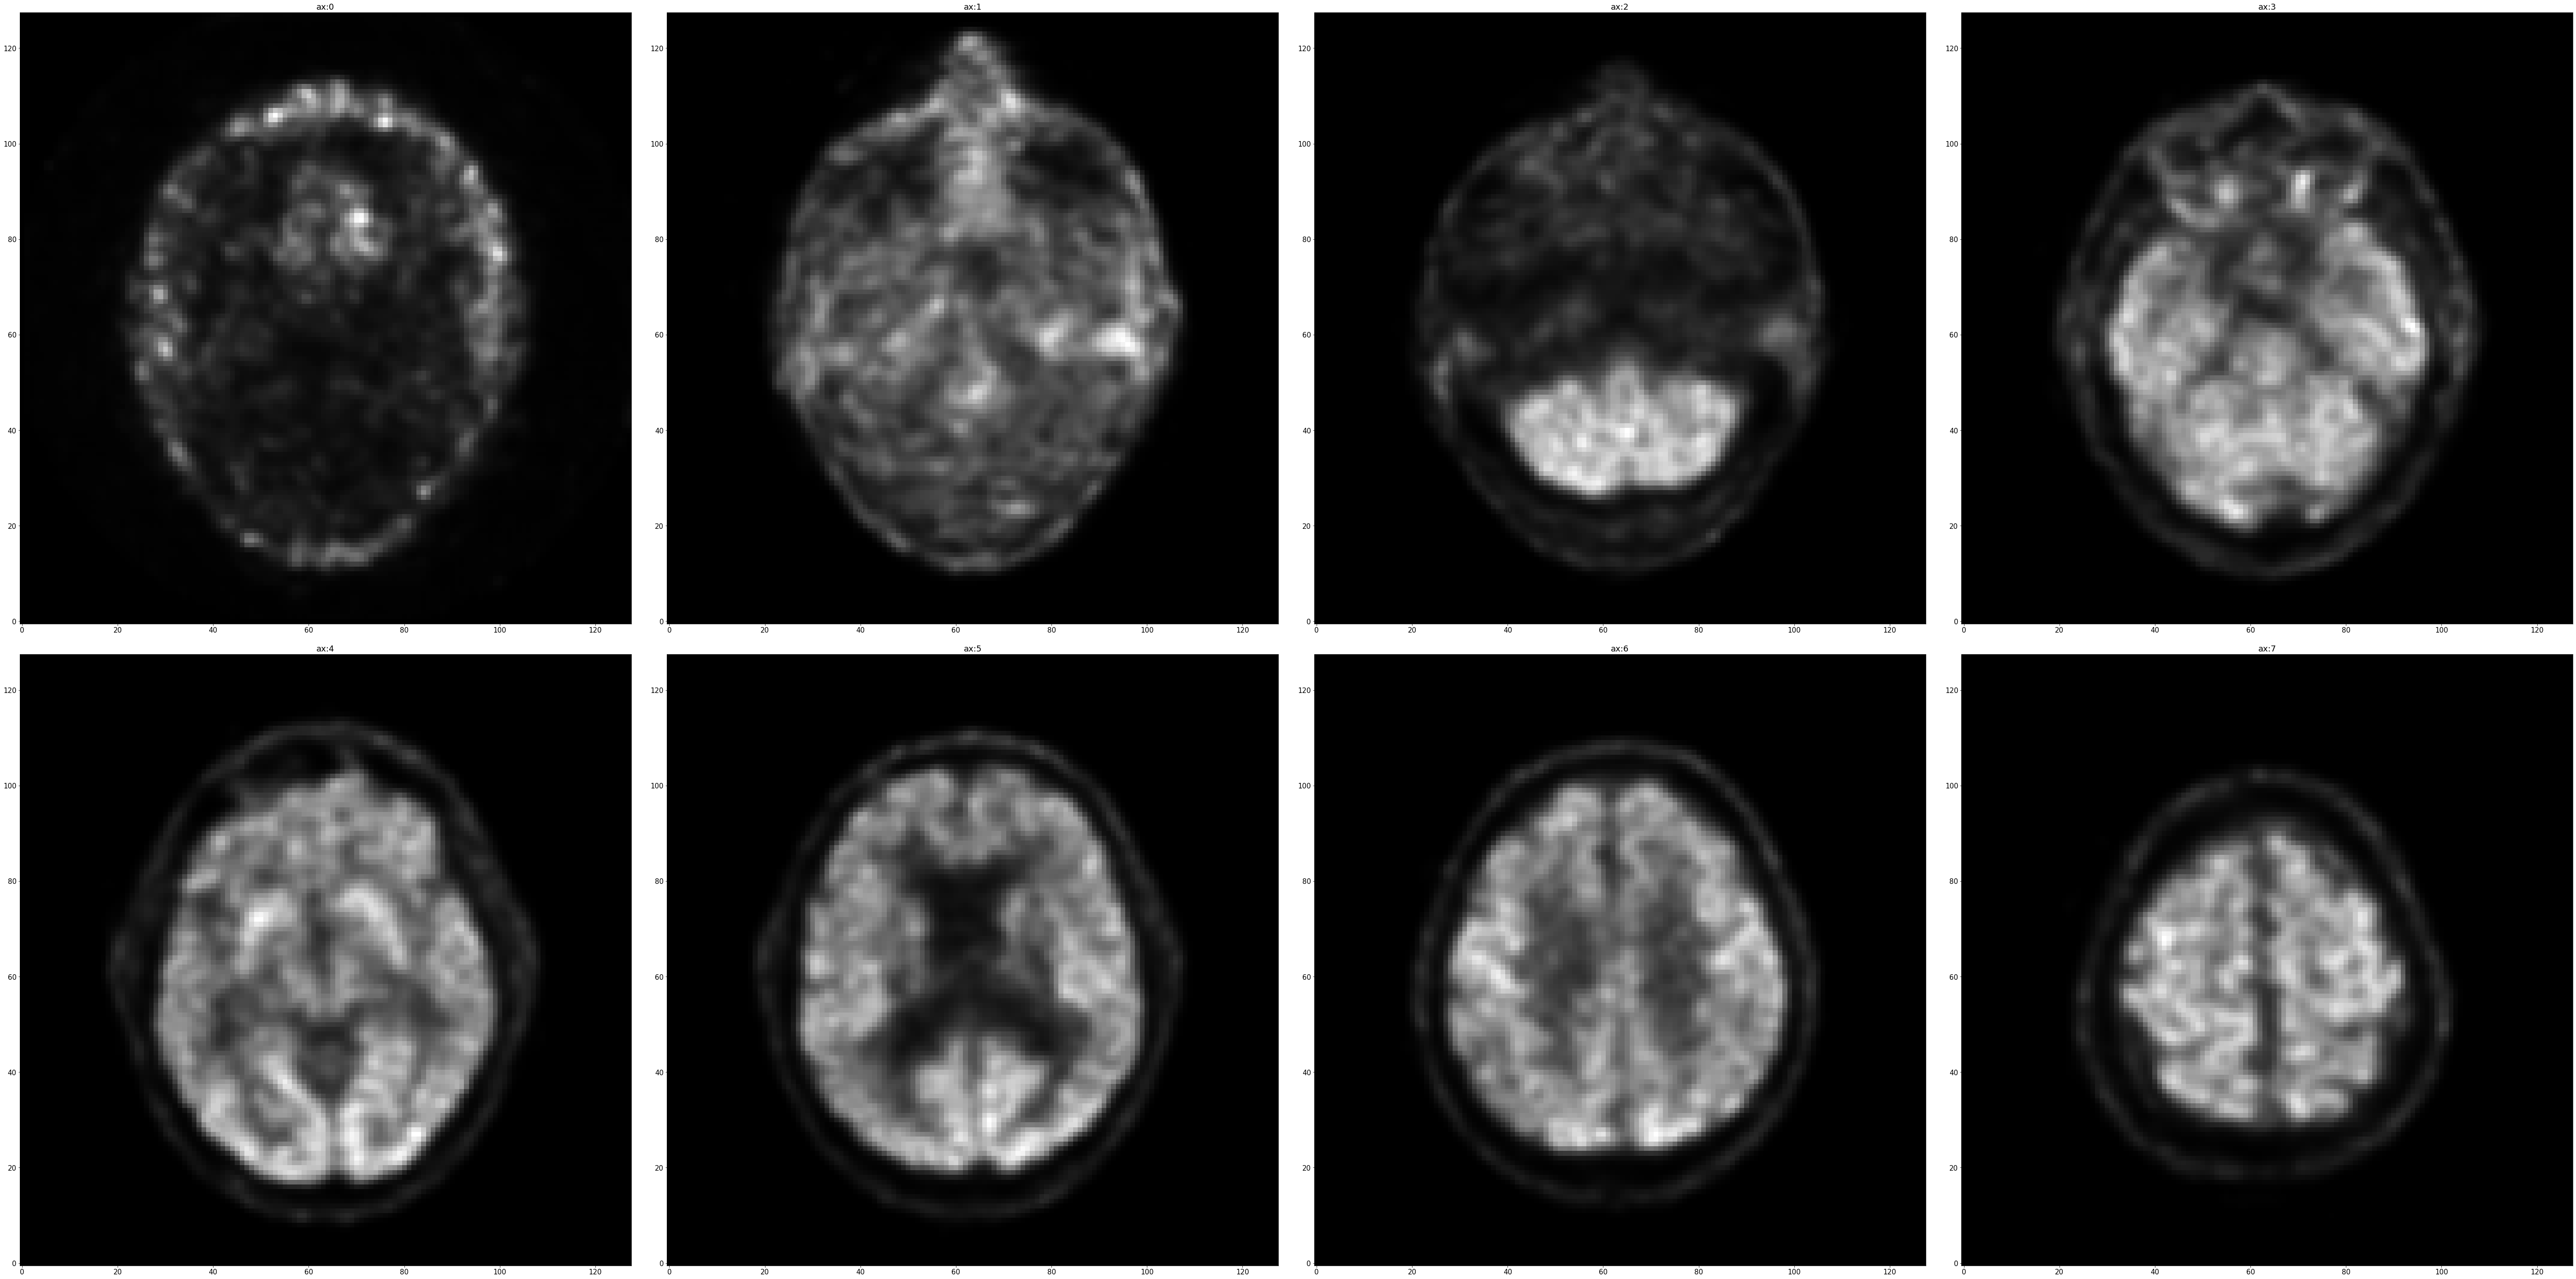

Text(0.5, 0.98, 'Coronal plane - CN')

<Figure size 432x288 with 0 Axes>

In [70]:
image_CN_slices = [first_CN_image[layer,:,:] for layer in range(0,first_CN_image.shape[0],SKIP_LAYERS)]
dplay.display_advanced_plot(image_CN_slices)
plt.suptitle("Coronal plane - CN")  

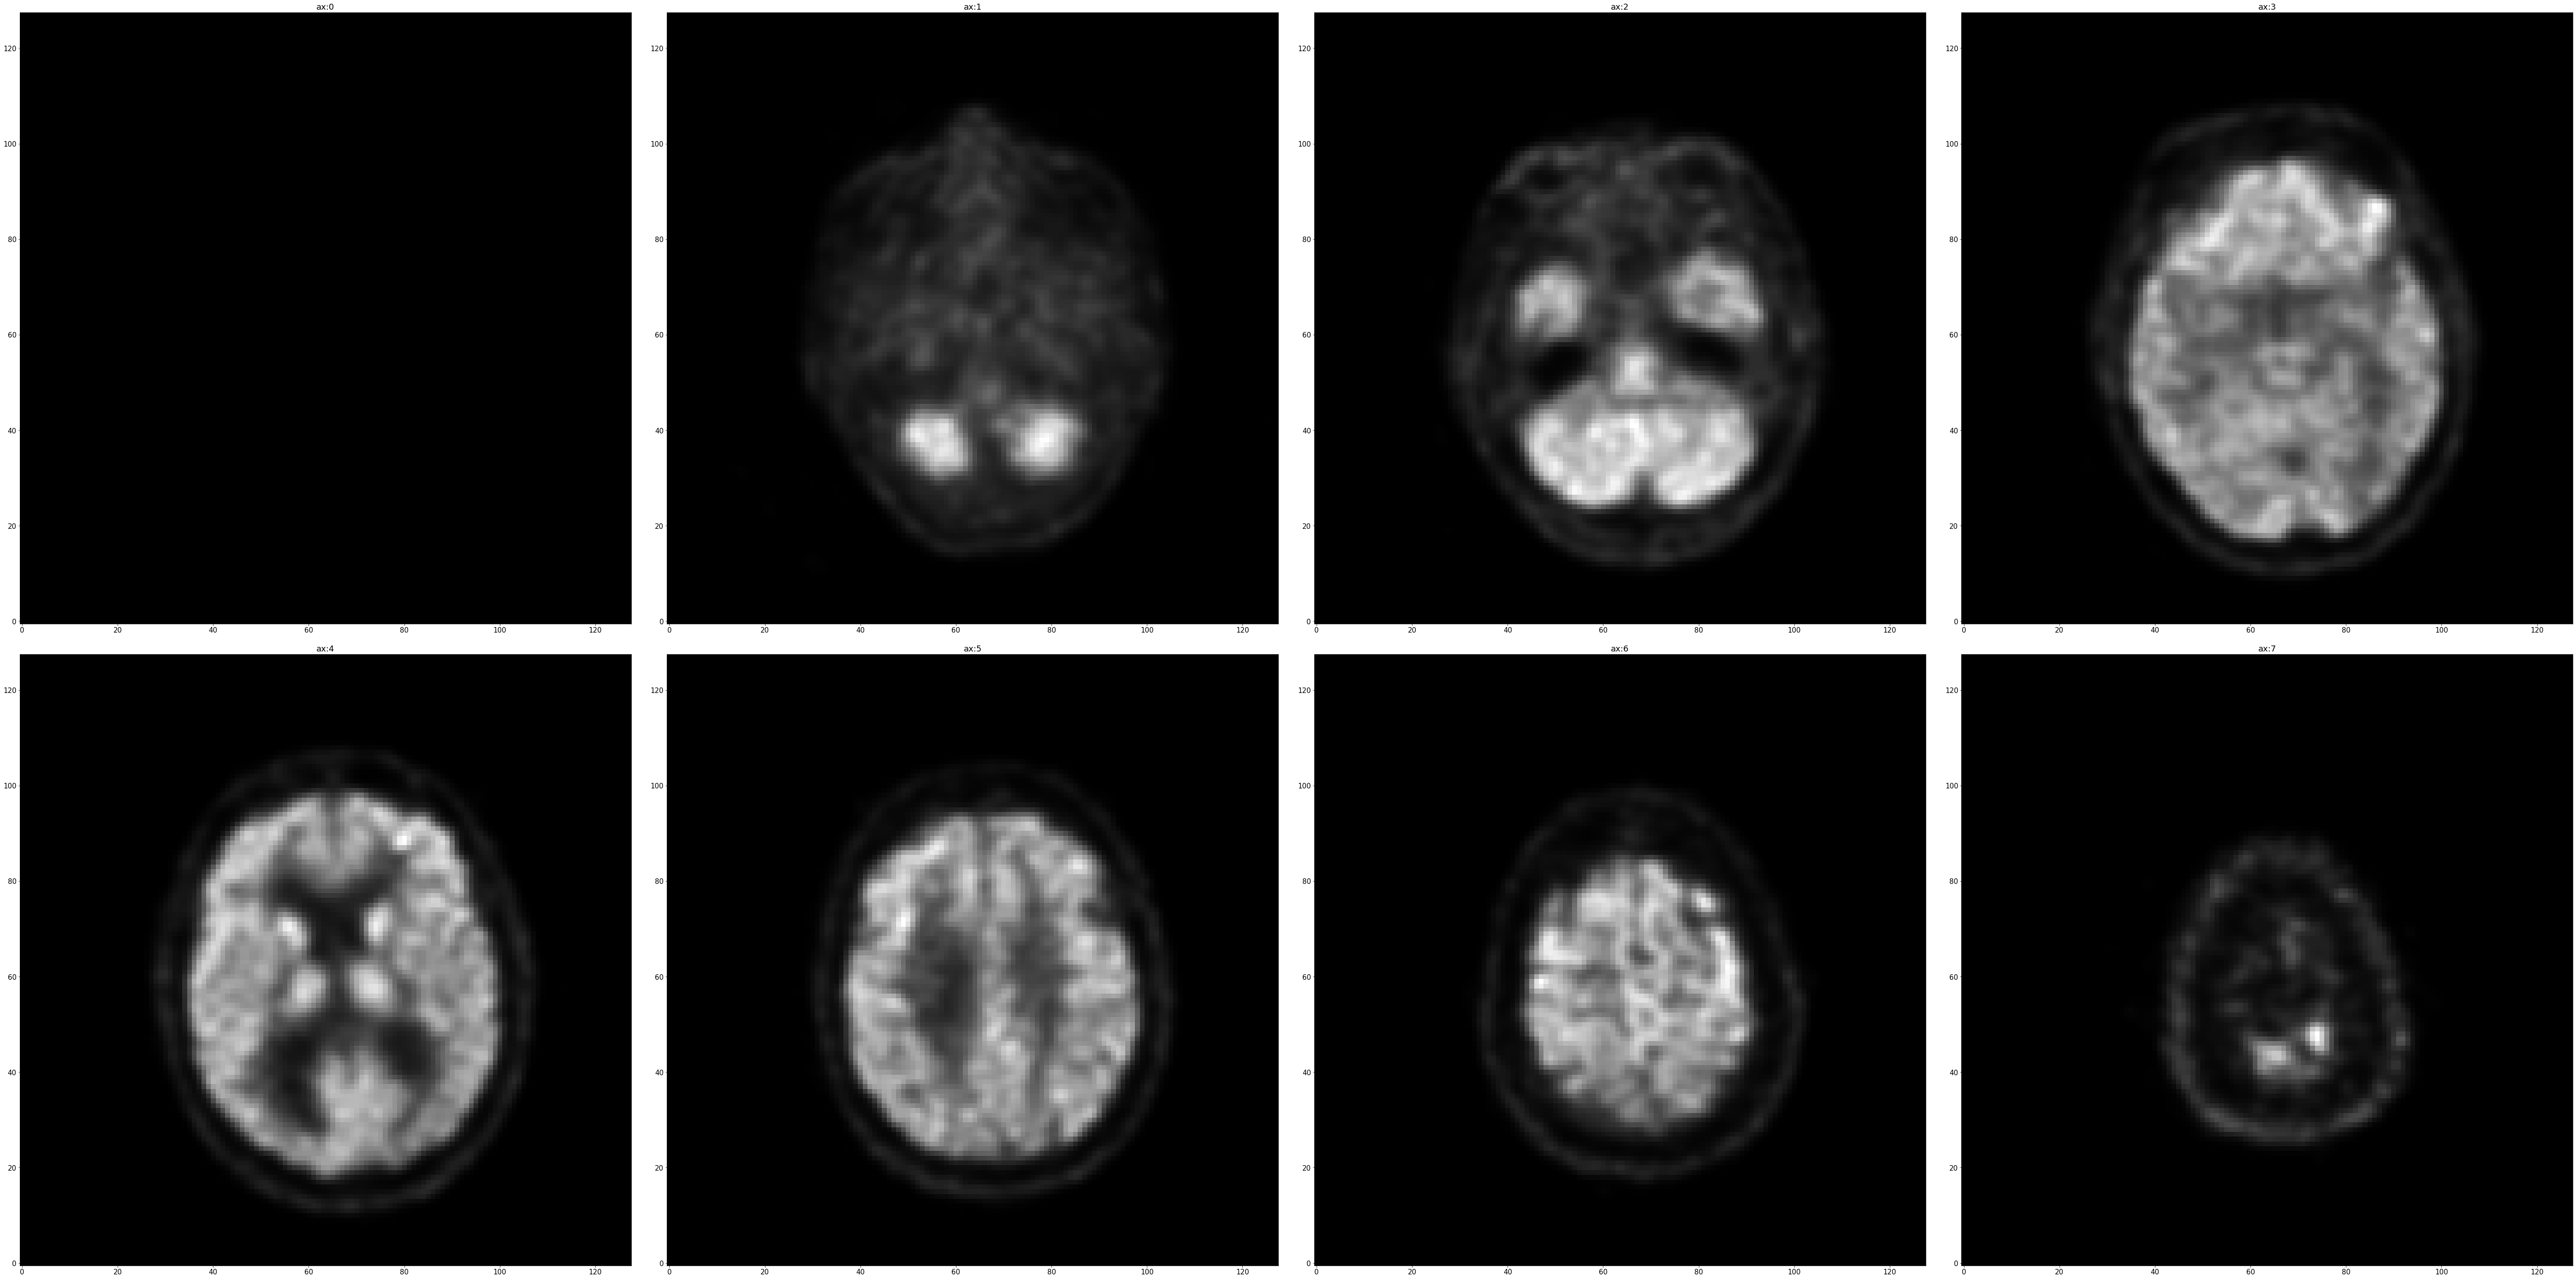

Text(0.5, 0.98, 'Coronal plane - MCI')

<Figure size 432x288 with 0 Axes>

In [69]:
image_MCI_slices = [first_MCI_image[layer,:,:] for layer in range(0,first_MCI_image.shape[0],SKIP_LAYERS)]
dplay.display_advanced_plot(image_MCI_slices)
plt.suptitle("Coronal plane - MCI")  

### Sagittal plane (From front)

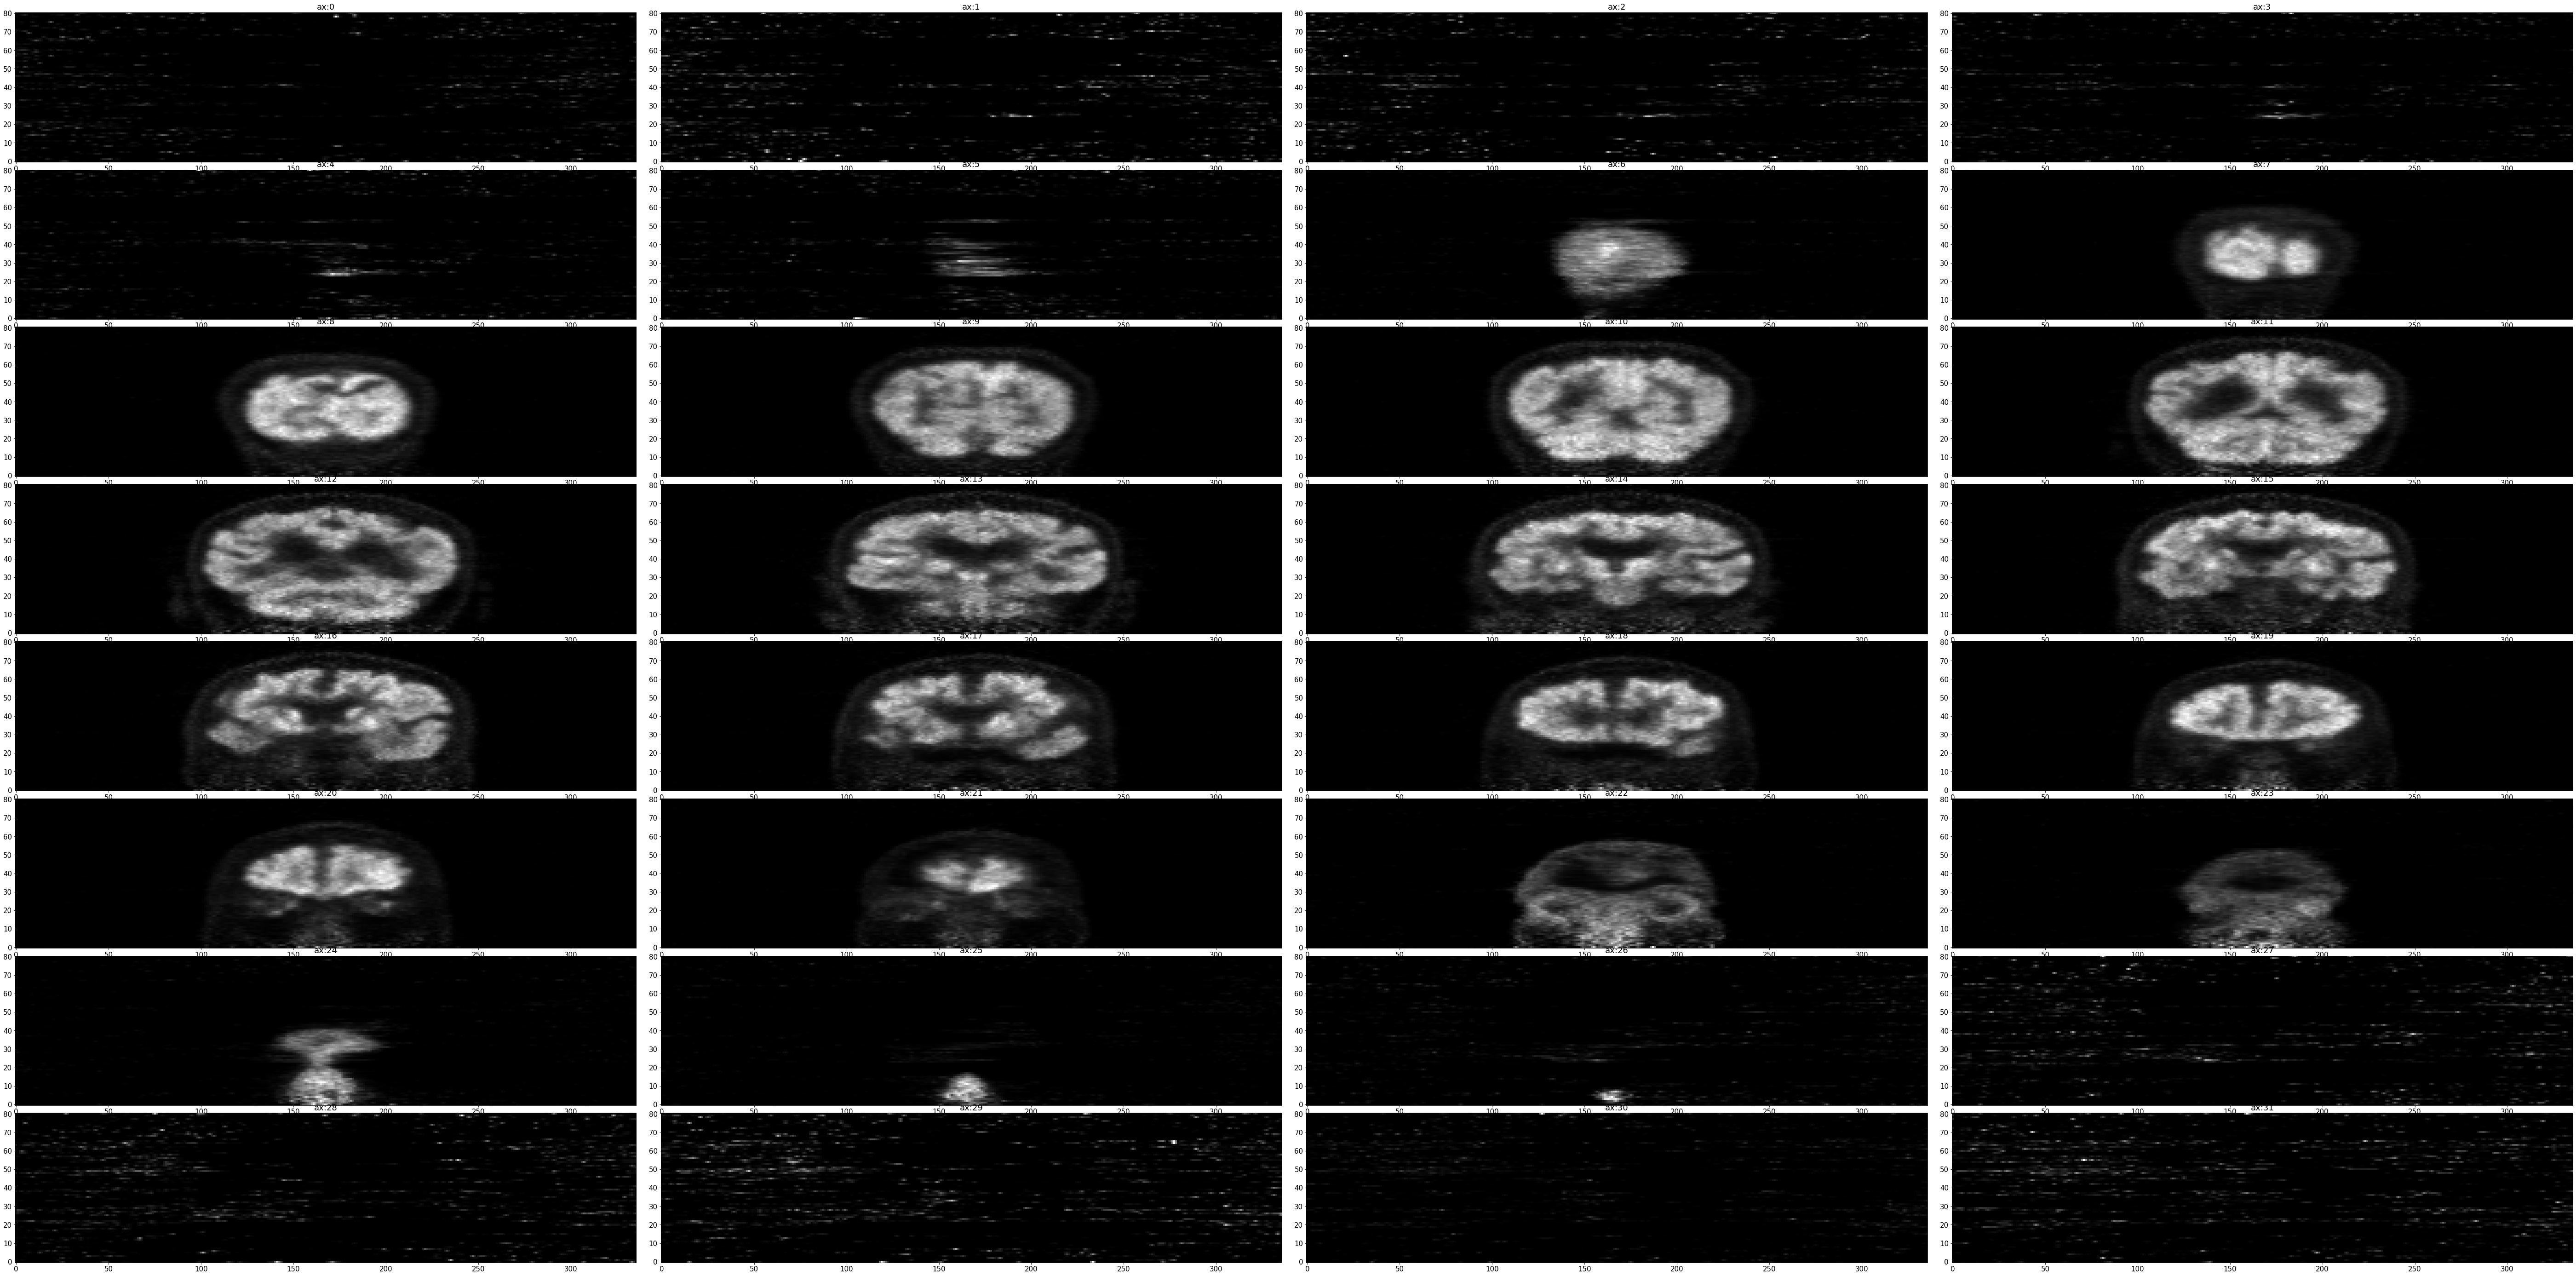

Text(0.5, 0.98, 'Sagittal plane')

<Figure size 432x288 with 0 Axes>

In [68]:
image_slices = [first_AD_image[:,layer,:] for layer in range(0,first_AD_image.shape[1], SKIP_LAYERS)]
dplay.display_advanced_plot(image_slices)
plt.suptitle("Sagittal plane")  

### Horisontal plane (from side)

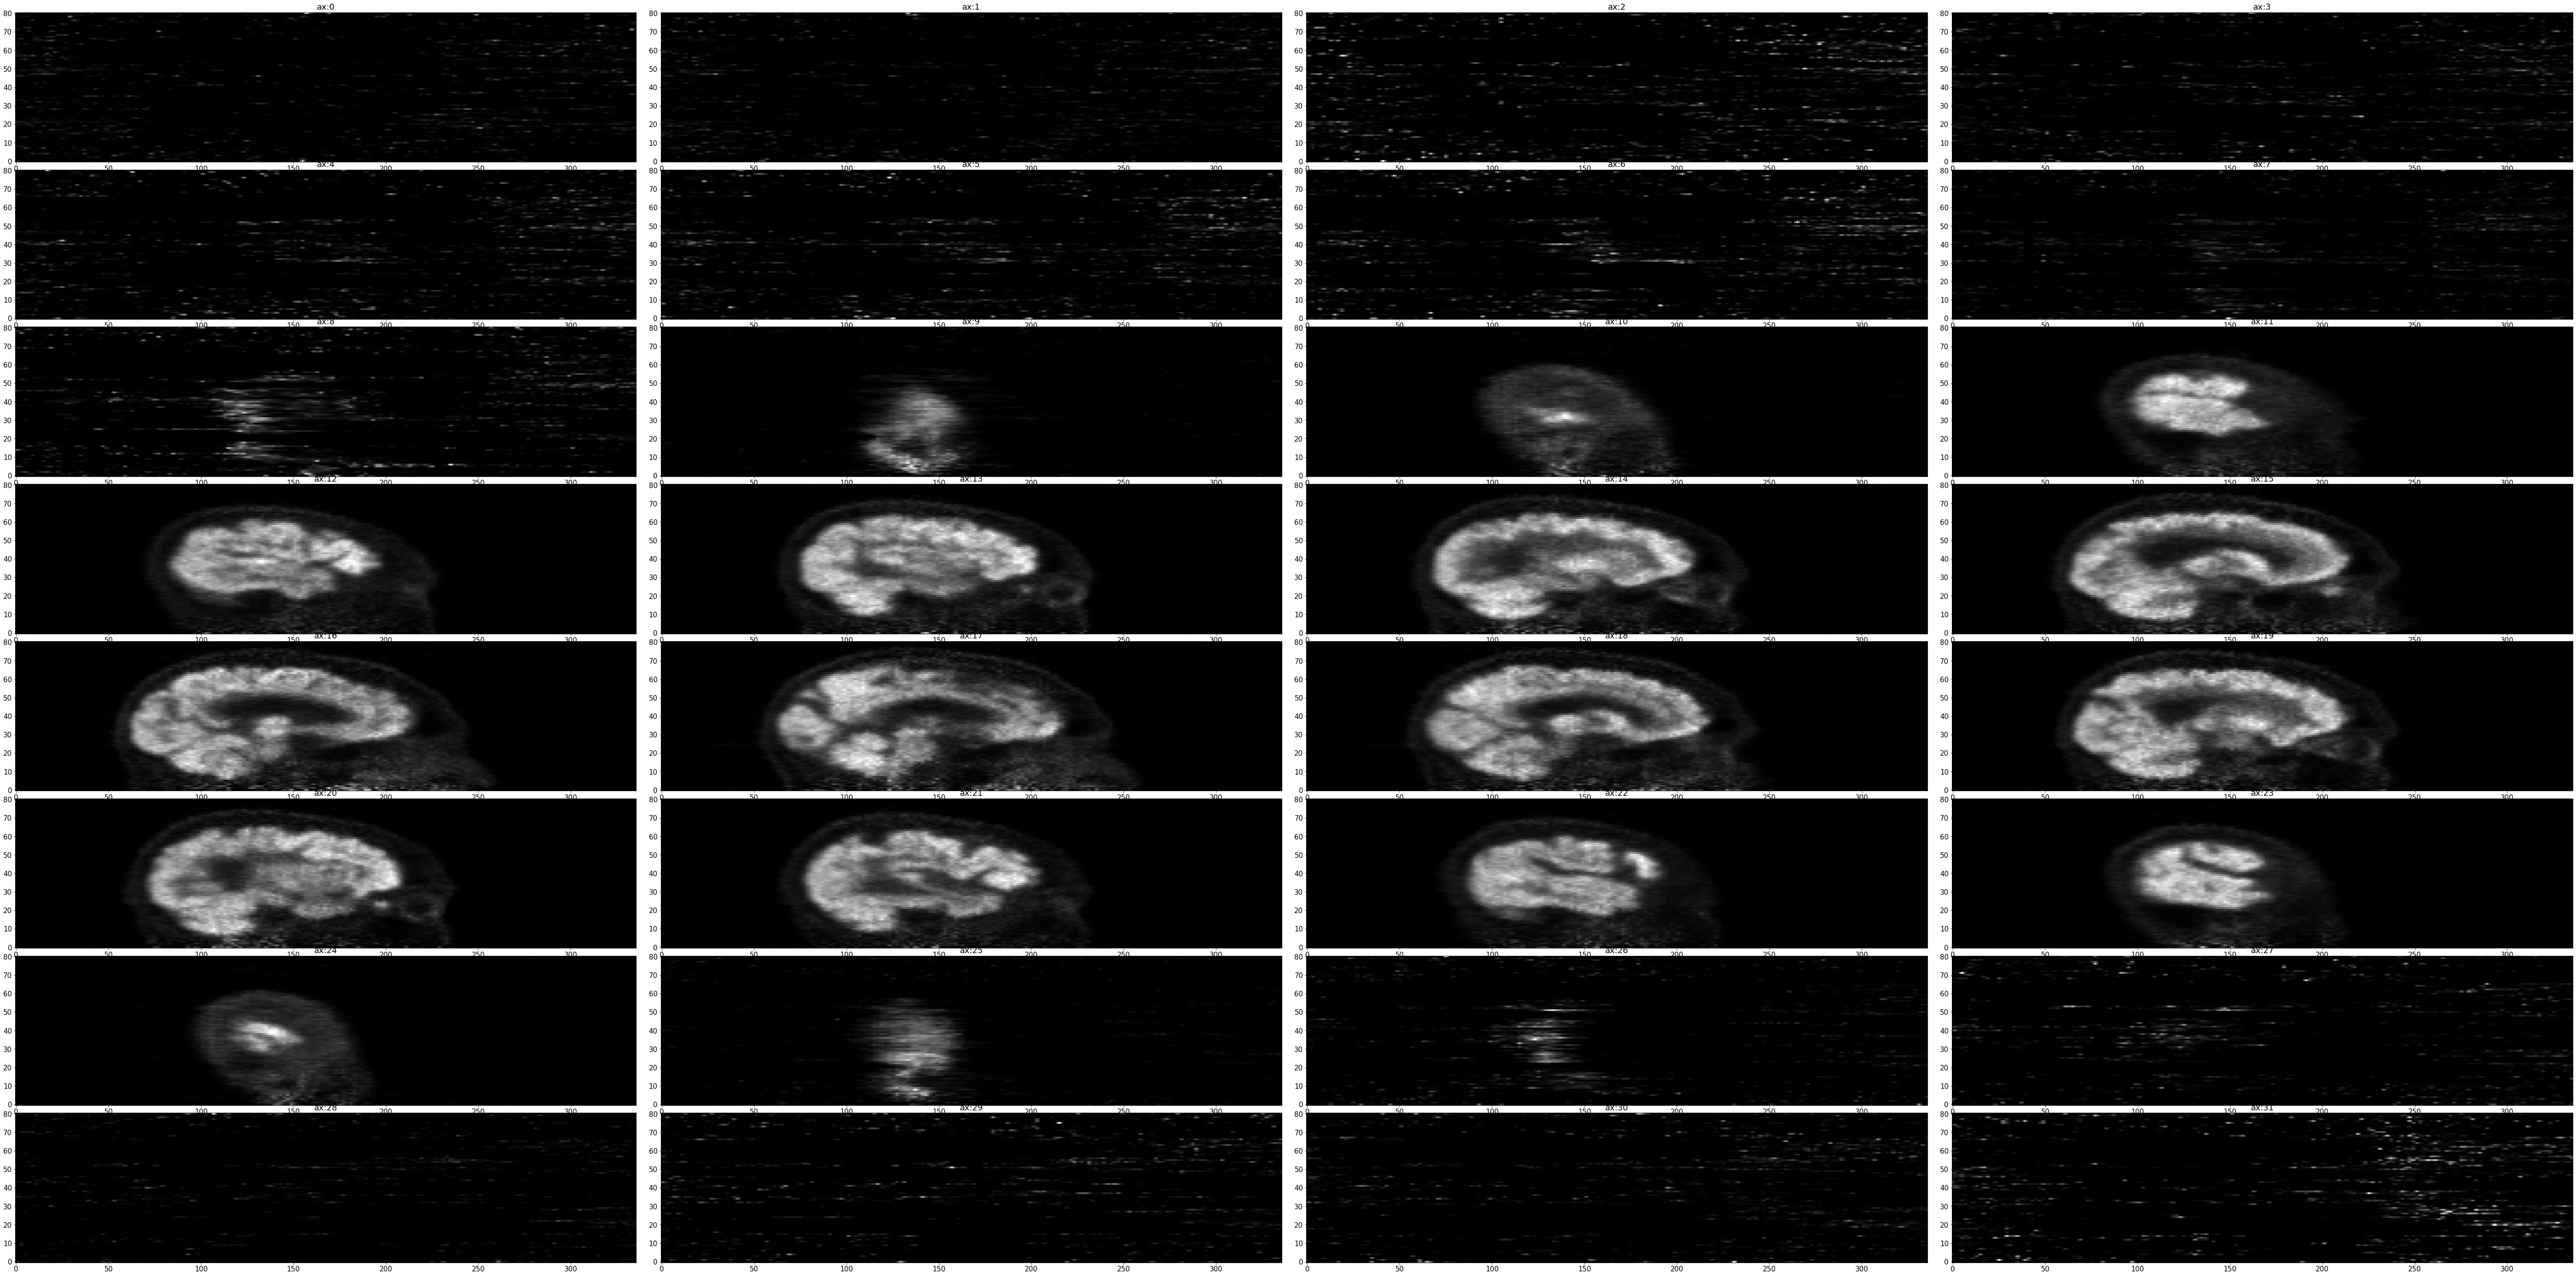

Text(0.5, 0.98, 'Horisonal plane')

<Figure size 432x288 with 0 Axes>

In [67]:
image_slices = [first_AD_image[:,:,layer] for layer in range(0,first_AD_image.shape[2], SKIP_LAYERS)]
dplay.display_advanced_plot(image_slices)
plt.suptitle("Horisonal plane")  

# Notes
* Dont take 60 min dynamic - Iter(Brain Mod

In [22]:
# Can we see a difference between MCI, CN and AD?

In [23]:
# How is the images before preprocess?

In [24]:
# How is the images after preprocess?

In [25]:
# Distribution? (Can be text as well)